In [1]:
import numpy as np
import pandas as pd
import csky as cy
import matplotlib.pyplot as plt
import scipy.stats
import histlite as hl
import matplotlib as mpl
mpl.rc('font', size=16) 

post trials p-value for lc

In [2]:
base_dir = '/data/user/ssclafani/data/analyses/XRB'
ana_name = 'combo'
sources = pd.read_hdf('/home/ssclafani/XRB_Analysis/XRB/sources/lc_sources_reselected_IC86.hdf')
names = sources.name_disp


In [23]:
sources[sources.name_disp == 'IGR_J19140_plus_0951']

,name,name_disp,var,excess_var,mean_rate,dec_deg,ra_deg,lc_bins_10,lc_values_10,mean_active_flux
229,IGR J19140+0951,IGR_J19140_plus_0951,5.061066,11.426589,0.00171,9.883,288.518,"[53416.0, 53420.5, 53423.5, 53432.5, 53440.0, ...","[0.0, 0.008199620852288184, 0.0, 0.00296748556...",0.001116


In [3]:

sigfile = '/data/user/ssclafani/data/analyses/XRB_baseline_v1.0/combo/lc/TSD_chi2.dict'
sig = np.load(sigfile, allow_pickle=True)
thresh = 0.0
lag = 0.0
cutoff_GeV = np.inf
all_pvals = {}
unblinded_tss = {}
unblinded_pvals = []
t_unb_pvals = {}
t_unb_tss = {}
t_unb_gammas = {}
t_unb_threshs = {}
t_unb_lags = {}
t_unb_nss = {}



for name in names:
    b = cy.bk.get_best(sig, 'name', name, 'fit_gamma', 'gp_inj',  'src_gamma_2.0',        
                 'thresh_{}'.format(thresh), 'lag_{}'.format(lag), 'cutoff_{}'.format(cutoff_GeV),  'bg')
    bkg_tss = b.trials.ts
    unblinded_results = np.load(f'/data/user/ssclafani/data/analyses/XRB_baseline_v1.0/combo/lc/{name}/results/result.npy')
    unblinded_pval = unblinded_results['pval']
    unblinded_pvals.append(unblinded_pval)
    t_unb_pvals[name] = unblinded_results['pval']
    t_unb_tss[name] = unblinded_results['ts']
    t_unb_nss[name] = unblinded_results['ns']
    t_unb_lags[name] = unblinded_results['lag']
    t_unb_threshs[name] = unblinded_results['thresh']
    t_unb_gammas[name] = unblinded_results['gamma']
    
    pval = [np.mean(bkg_tss >= ts) for ts in bkg_tss]
    all_pvals[name] = pval

In [4]:
print('Source Name &  Source Dec [deg] & Source RA [deg] &  TS  & ns  & gamma & thresh & lag & p-value & UL_E2  & UL_E3 \\')
for name in names:
    
    print(f'{name} & {sources[sources.name_disp == name].dec_deg.values[0]:.2f} &'
    f' {sources[sources.name_disp == name].ra_deg.values[0]:.2f} &'
    f' {t_unb_tss[name][0]:.2f} & {t_unb_nss[name][0]:.2f} & {t_unb_gammas[name][0]:.2f} & {t_unb_threshs[name][0]:.2f} & {t_unb_lags[name][0]:.2f}'
    f'')

Source Name &  Source Dec [deg] & Source RA [deg] &  TS  & ns  & gamma & thresh & lag & p-value & UL_E2  & UL_E3 \
IGR_J00370_plus_6122 & 61.36 & 9.29 & 1.01 & 4.76 & 2.39 & 0.00 & 7.00
3A_0114_plus_650 & 65.29 & 19.51 & 6.52 & 29.27 & 4.00 & 0.00 & -4.79
4U_0115_plus_634 & 63.74 & 19.63 & 0.69 & 3.48 & 4.00 & 0.02 & -3.32
V0332_plus_53 & 53.17 & 53.75 & 2.08 & 3.32 & 3.14 & 0.17 & -1.84
LSV_plus_44_17 & 44.53 & 70.25 & 6.19 & 10.49 & 2.49 & 0.41 & 0.37
1A_0535_plus_262 & 26.32 & 84.72 & 0.00 & 0.00 & 1.00 & 1.42 & -7.00
GS_0834_dash_430 & -43.19 & 128.98 & 4.06 & 9.84 & 4.00 & 0.00 & -1.11
Vela_X_dash_1 & -40.55 & 135.53 & 5.16 & 33.91 & 3.27 & 0.28 & 5.52
GRO_J1008_dash_57 & -58.30 & 152.43 & 7.33 & 12.85 & 3.93 & 0.16 & -1.93
Cen_X_dash_3 & -60.62 & 170.31 & 6.20 & 66.73 & 2.71 & 0.06 & 1.84
IGR_J11435_dash_6109 & -61.13 & 176.00 & 8.70 & 18.77 & 1.00 & 0.00 & 2.58
H_1145_dash_619 & -62.21 & 177.00 & 6.81 & 7.06 & 1.00 & 0.00 & -6.25
GX_301_dash_2 & -62.77 & 186.66 & 7.47 & 2.94 & 1

In [5]:
unblinded_results

array([(4., -6.99998835, 1.79322419, 0.01122312, 2.24640856e+09, 1.13237475, 0.6868)],
      dtype=[('gamma', '<f8'), ('lag', '<f8'), ('ns', '<f8'), ('thresh', '<f8'), ('seed', '<f8'), ('ts', '<f8'), ('pval', '<f8')])

In [6]:
values = np.array(list(all_pvals.values()))
lowest_pvalues = values.min(axis=0)

In [7]:
unblinded_pvals = np.concatenate(unblinded_pvals)

In [8]:
lowest_unblinded_pval = np.min(unblinded_pvals)

post_trials_pval = np.mean(lowest_pvalues <= lowest_unblinded_pval)

Pre Trial Pvalue: 0.0093
Pre Trial Significance: 2.353452182117339
------------------------
Post Trials Significance: 0.5019
Post Trial Significance: -0.004762611726370971


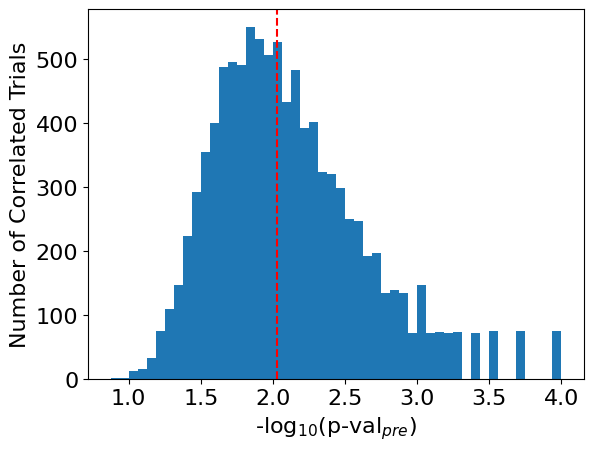

In [9]:
plt.hist(-np.log10(lowest_pvalues), bins=50);
plt.axvline(-np.log10(lowest_unblinded_pval), color='r', linestyle='--')
plt.xlabel('-log$_{10}$(p-val$_{pre}$)')
plt.ylabel('Number of Correlated Trials')


print('Pre Trial Pvalue:'   , lowest_unblinded_pval)
print('Pre Trial Significance:', scipy.stats.norm.isf(lowest_unblinded_pval))

print('------------------------')
print('Post Trials Significance:', post_trials_pval)
print('Post Trial Significance:', scipy.stats.norm.isf(post_trials_pval))



In [10]:
import sys
sys.path.insert(0, '/home/ssclafani/XRB_Analysis/XRB/')

In [11]:
import config as cg
import XRB_Sens

Running as User: ssclafani on Hostname: cobalt-14.icecube.wisc.edu


In [12]:
repo = cy.selections.Repository()
overlap_file = cg.overlap_file
cspec = cy.selections.DNNCascadeDataSpecs.DNNC_12yr
psspec = cy.selections.PSDataSpecs.ps_v4_15yr[3:]
ana = cy.get_analysis(repo, 'version-004-p03', psspec, 'version-001-p02', cspec)
ind_list = np.load(overlap_file)
ana[0].data = cy.utils.Arrays(
        ana[0].data.as_dataframe.drop(
        labels=ind_list, 
        errors='ignore',  # Ignore events that are not present since we are just using IC86
    ))

Setting up Analysis for:
IC86v4_12yr, DNNCascade_12yr
Setting up IC86v4_12yr...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2016_MC.npy ...


Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2011_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2012_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2013_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2014_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2015_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2016_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2017_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2018_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2019_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2020_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2021_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/IC86_2022_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-004-p03/GRL/IC86_2011_exp.npy ...
Reading /data/ana/ana

In [13]:
conf, inj_conf = cg.get_ps_config(ana, name='IGR_J19140_plus_0951', src_gamma=2.0, fix_gamma=None, cutoff_GeV=np.inf, lag=0, thresh=0, inject_gp=False)

IGR_J19140_plus_0951
229    9.883
Name: dec_deg, dtype: float64
Source RA: 288.518 DEC: 9.883
[55738.5 55740.5 55778.5 55779.5 55886.5 55888.5 56022.5 56024.5 56144.5
 56147.5 56155.5 56252.5 56254.5 56523.5 56525.5 56572.5 56591.5 56595.5
 56672.5 56677.5 56794.5 56798.5 56808.5 56812.5 56875.5 56879.5 57079.5
 57081.5 57350.5 57353.5 57358.5 57459.5 57461.5 57499.5 57500.5 57608.5
 57609.5 57878.5 57882.5 58001.5 58003.5 58068.5 58071.5 58082.5 58084.
 58189.5 58208.5 58461.  58464.5 58559.5 58584.  58797.5 58802.5 59837.5
 59840.5]
55694.419901764544
60276.867770826386
lag: 0
thresh: 0
fitting gamma


In [14]:
tr = cy.get_trial_runner(
        conf=conf,
        inj_conf=inj_conf, 
        ana=ana, 
        flux=cy.hyp.PowerLawFlux(2.0, energy_cutoff=np.inf), 
        mp_cpus=12)
tr_fixed = cy.get_trial_runner(
        conf=conf,
        inj_conf = inj_conf,
        ana = ana,
        flux=cy.hyp.PowerLawFlux(2.0, energy_cutoff=np.inf),
        fitter_args=dict(lag=-6.9999865, thresh=0.001519)
)


In [15]:
result = tr.get_one_fit(TRUTH=True)
trial = tr.get_one_trial(TRUTH=True)

In [16]:
tr_fixed.get_one_fit(TRUTH=True)

[17.604755543046725, 43.179102202601925, 2.916803058663001]

In [17]:
print(tr.format_result (result))

TS                  17.604802769165403
ns                  43.19165144650048
thresh              0.0015190000277659037
lag                 -6.9999865825592655
gamma               2.918591598740703


(55680.42000176454, 60276.86787082638)

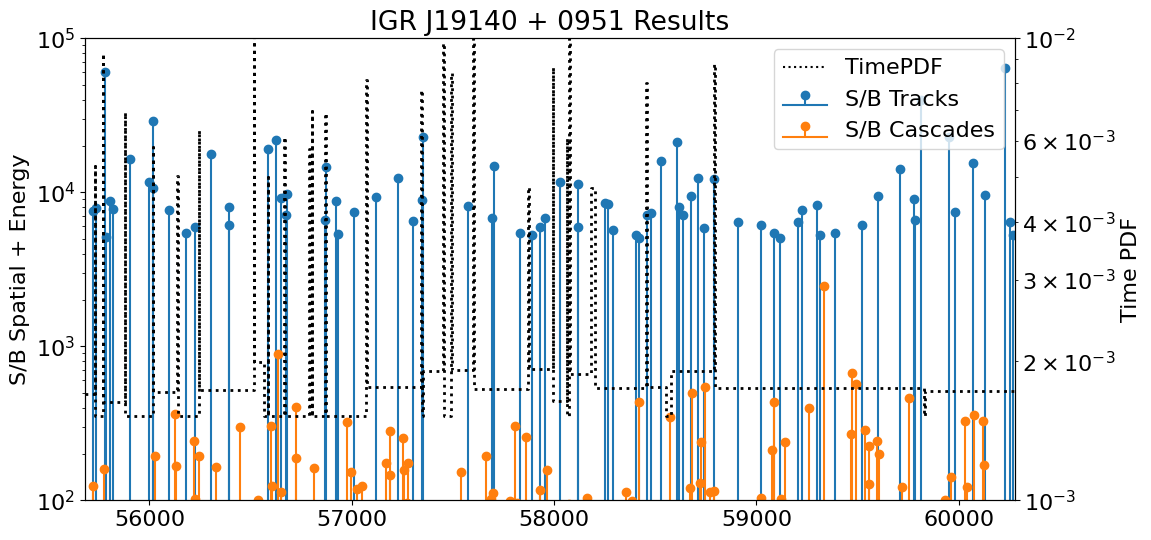

In [18]:

trial = tr.get_one_trial(TRUTH=True)
tuple(trial)

L = tr.get_one_llh_from_trial(trial)

fig, ax1 = plt.subplots(figsize=(12,6))

ts = result[0]
ns = result[1]
thresh = result[2]
lag = result[3]
gamma = result[4]

a = ana
colors = ['C0', 'C1']
datasets = ['Tracks', 'Cascades']
threshs = [5e3,10]
for i in range(0,len(a)):
    ev=a[i].data
    space_model = cy.inspect.get_space_model(tr, 0)
    space_eval = cy.pdf.PointSourceSpacePDFRatioEvaluator(ev, space_model)
    energy_model = cy.inspect.get_energy_model(tr, 0)
    energy_eval = cy.pdf.EnergyPDFRatioEvaluator(ev, energy_model)

    time_model = cy.inspect.get_time_model(tr,0)


    rpdfs = space_eval()[0]
    epdfs = energy_eval(gamma=gamma)[0]
    sb = rpdfs*epdfs
    #ax1.plot(np.nan, np.nan, ls = '--', c='k', label='TimePDF')
    

    ax1.stem(ev['mjd'][sb>threshs[i]],sb[sb>threshs[i]], linefmt=colors[i], basefmt=colors[i], markerfmt=colors[i], label=f'S/B {datasets[i]}')
h = time_model.lcs[0]
bins = h._bins[0]- 6.9999
values = np.array([max(val, thresh) for val in h.values])

h2 = hl.Hist(bins=bins, values=values)
ax1.plot(np.nan, np.nan, ls=':', color = 'k', label='TimePDF')
plt.title('IGR J19140 + 0951 Results')
ax1.legend(loc='upper right')
ax1.semilogy()
ax2 = ax1.twinx()

ax2.semilogy()
#ax2.set_ylim(0,0.06)
#ax1.set_ylim(0,75000)
ax1.set_ylabel('S/B Spatial + Energy')
ax2.set_ylabel('Time PDF')
hl.plot1d(ax=ax2, h=h2, color = 'k', lw=2, ls = ':')
#hl.plot1d(ax=ax2, h=h, color='green')
#ax2.legend(loc='upper ri)
ax2.set_ylim(1e-3,1e-2)
ax1.set_ylim(100,1e5)
ax1.set_xlim(min(bins), max(bins))

In [48]:
def length_where_value_above(bin_edges, bin_values, threshold):
    # bin_edges: array of length n+1
    # bin_values: array of length n
    widths = np.diff(bin_edges)  # length n
    mask = bin_values > threshold
    return widths[mask].sum()

length_where_value_above(h2.bins[0], h2.values, .003)


82.0

In [19]:
#upper limits
base_dir = '/data/user/ssclafani/data/analyses/XRB_baseline_v1.0/'
sigfile = '{}/combo/lc/TSD_chi2.dict'.format(base_dir)
sig = np.load(sigfile, allow_pickle=True)

In [20]:
sig['name']['3A_0114_plus_650']

{'fit_gamma': {'gp_inj': {'src_gamma_2.0': {'thresh_0.0': {'lag_0.0': {'cutoff_inf': {'bg': Chi2TSD(10000 trials, eta=1.000, ndof=7.599, median=6.389 (from fit 6.469))}}}}},
  'no_gpinj': {'src_gamma_2.0': {'thresh_0.0': {'lag_0.0': {'cutoff_inf': {'nsig': {10.0: Chi2TSD(10000 trials, eta=1.000, ndof=5.203, median=16.137 (from fit 16.334)),
        100.0: Chi2TSD(10000 trials, eta=1.000, ndof=48.523, median=199.688 (from fit 199.395)),
        20.0: Chi2TSD(10000 trials, eta=1.000, ndof=8.697, median=32.053 (from fit 31.843)),
        40.0: Chi2TSD(10000 trials, eta=1.000, ndof=22.844, median=70.039 (from fit 69.803)),
        5.0: Chi2TSD(10000 trials, eta=1.000, ndof=5.207, median=10.190 (from fit 10.506)),
        50.0: Chi2TSD(10000 trials, eta=1.000, ndof=28.653, median=90.291 (from fit 90.232))}}}}},
   'src_gamma_3.0': {'thresh_0.0': {'lag_0.0': {'cutoff_inf': {'nsig': {10.0: Chi2TSD(4000 trials, eta=1.000, ndof=7.074, median=8.275 (from fit 8.352)),
        100.0: Chi2TSD(4000 

In [21]:
src_gamma = 3.0
cutoff = np.inf
lag = 0.0
thresh = 0.0

for n in sig['name'].keys():
    sig_trials = cy.bk.get_best(sig, 'name', n, 'fit_gamma', 'no_gpinj', 'src_gamma_{}'.format(src_gamma), 
                            'thresh_{}'.format(thresh), 'lag_{}'.format(lag), 'cutoff_{}'.format(cutoff), 'nsig')
    b = cy.bk.get_best(sig, 'name', n, 'fit_gamma', 'gp_inj',  'src_gamma_2.0'.format(src_gamma),
                                'thresh_{}'.format(thresh), 'lag_{}'.format(lag), 'cutoff_{}'.format(cutoff_GeV),  'bg')
    if (len(b) < 10000):
        print(n, len(b))
    print(n, sig_trials.keys(), [len(sig_trials[x]) for x in sig_trials.keys()])

IGR_J00370_plus_6122 dict_keys([10.0, 100.0, 20.0, 40.0, 5.0, 50.0]) [4000, 4000, 4000, 4000, 4000, 4000]
3A_0114_plus_650 dict_keys([10.0, 100.0, 20.0, 40.0, 5.0, 50.0]) [4000, 4000, 4000, 4000, 4000, 4000]
4U_0115_plus_634 dict_keys([10.0, 100.0, 20.0, 40.0, 5.0, 50.0]) [4000, 4000, 4000, 4000, 4000, 4000]
V0332_plus_53 dict_keys([10.0, 100.0, 20.0, 40.0, 5.0, 50.0]) [4000, 4000, 4000, 4000, 4000, 4000]
LSV_plus_44_17 dict_keys([10.0, 100.0, 20.0, 40.0, 5.0, 50.0]) [4000, 4000, 4000, 4000, 4000, 4000]
1A_0535_plus_262 dict_keys([10.0, 100.0, 20.0, 40.0, 5.0, 50.0]) [4000, 4000, 4000, 4000, 4000, 4000]
GS_0834_dash_430 dict_keys([10.0, 100.0, 20.0, 40.0, 5.0, 50.0]) [4000, 4000, 4000, 4000, 4000, 4000]
Vela_X_dash_1 dict_keys([10.0, 100.0, 20.0, 40.0, 5.0, 50.0]) [4000, 4000, 4000, 4000, 4000, 4000]
GRO_J1008_dash_57 dict_keys([10.0, 100.0, 20.0, 40.0, 5.0, 50.0]) [4000, 4000, 4000, 4000, 4000, 4000]
Cen_X_dash_3 dict_keys([10.0, 100.0, 20.0, 40.0, 5.0, 50.0]) [4000, 4000, 4000, 4000,

In [22]:
sens_E2 = np.load(base_dir + '/combo/lc/sens_lag_0.0_thresh_0.0_E2.0.npy', allow_pickle=True)[()]
sens_E3 = np.load(base_dir + '/combo/lc/sens_lag_0.0_thresh_0.0_E3.0.npy', allow_pickle=True)[()]

dp_E2 = np.load(base_dir + '/combo/lc/dp5.0sig_lag_0.0_thresh_0.0_E2.0.npy', allow_pickle=True)[()]
dp_E3 = np.load(base_dir + '/combo/lc/dp5.0sig_lag_0.0_thresh_0.0_E3.0.npy', allow_pickle=True)[()]



UL_E2 = np.load(base_dir + '/combo/lc/UL_lag_0.0_thresh_0.0_E2.0.dict.npy', allow_pickle=True)[()]
UL_E3 = np.load(base_dir + '/combo/lc/UL_lag_0.0_thresh_0.0_E3.0.dict.npy', allow_pickle=True)[()]



In [54]:
print('Source Name &  Source Dec [deg] & Source RA [deg] &  TS  & ns  & gamma & thresh & lag & p-value & UL E$^{-2} x 1e3$  & UL E$^{-3}$ \\\\')
for name in names:
    name_print = name.replace('_plus_', '+')
    name_print = name_print.replace('_dash_', '-')
    name_print = name_print.replace('_dot_', '.')
    name_print = name_print.replace('_', ' ')

    plot_UL_E2 = max(UL_E2[name], sens_E2[name])
    plot_UL_E3 = max(UL_E3[name], sens_E3[name])

    print(f'{name_print} & {sources[sources.name_disp == name].dec_deg.values[0]:.2f} &'
    f' {sources[sources.name_disp == name].ra_deg.values[0]:.2f} &'
    f' {t_unb_tss[name][0]:.2f} & {t_unb_nss[name][0]:.2f} & {t_unb_gammas[name][0]:.2f} & {t_unb_threshs[name][0]:.2f} & {t_unb_lags[name][0]:.2f} &'
    f' {t_unb_pvals[name][0]:.3f} & {plot_UL_E2*1e3:.2f} & {plot_UL_E3*1e3:.2f} \\\\')

Source Name &  Source Dec [deg] & Source RA [deg] &  TS  & ns  & gamma & thresh & lag & p-value & UL E$^{-2} x 1e3$  & UL E$^{-3}$ \\
IGR J00370+6122 & 61.36 & 9.29 & 1.01 & 4.76 & 2.39 & 0.00 & 7.00 & 0.780 & 0.09 & 0.75 \\
3A 0114+650 & 65.29 & 19.51 & 6.52 & 29.27 & 4.00 & 0.00 & -4.79 & 0.484 & 0.18 & 1.98 \\
4U 0115+634 & 63.74 & 19.63 & 0.69 & 3.48 & 4.00 & 0.02 & -3.32 & 0.943 & inf & inf \\
V0332+53 & 53.17 & 53.75 & 2.08 & 3.32 & 3.14 & 0.17 & -1.84 & 0.308 & 0.09 & 0.99 \\
LSV+44 17 & 44.53 & 70.25 & 6.19 & 10.49 & 2.49 & 0.41 & 0.37 & 0.085 & 0.10 & 1.21 \\
1A 0535+262 & 26.32 & 84.72 & 0.00 & 0.00 & 1.00 & 1.42 & -7.00 & 0.799 & 0.04 & 0.53 \\
GS 0834-430 & -43.19 & 128.98 & 4.06 & 9.84 & 4.00 & 0.00 & -1.11 & 0.346 & 0.16 & 5.61 \\
Vela X-1 & -40.55 & 135.53 & 5.16 & 33.91 & 3.27 & 0.28 & 5.52 & 0.929 & inf & inf \\
GRO J1008-57 & -58.30 & 152.43 & 7.33 & 12.85 & 3.93 & 0.16 & -1.93 & 0.214 & 0.38 & 16.93 \\
Cen X-3 & -60.62 & 170.31 & 6.20 & 66.73 & 2.71 & 0.06 & 1.84 & 0

In [24]:
names = []
ras = []
decs = []
sens_E2_plot = []
sens_E3_plot = []

dp_5sigma_E2_plot = []
dp_5sigma_E3_plot = []

UL_E2_plot = []
UL_E3_plot = []

for sourcename in sources.name_disp:
    ra, dec = sources[sources.name_disp == sourcename].ra_deg.values, sources[sources.name_disp == sourcename].dec_deg.values
    ras.append(ra)
    decs.append(dec)
    names.append(sourcename)
    sens_E2_plot.append(sens_E2[sourcename])
    sens_E3_plot.append(sens_E3[sourcename])

    dp_5sigma_E2_plot.append(dp_E2[sourcename])
    dp_5sigma_E3_plot.append(dp_E3[sourcename])    
    #if UL_E2[sourcename] == np.inf:
    #    UL_E2[sourcename] = 1e-60
    #if UL_E3[sourcename] == np.inf:
    #    UL_E3[sourcename] = 1e-60
    

    UL_E2_plot.append(max(sens_E2[sourcename], UL_E2[sourcename]))
    UL_E3_plot.append(max(sens_E3[sourcename], UL_E3[sourcename]))

    

ras = np.concatenate(ras)
decs = np.concatenate(decs)





(1e-05, 0.01)

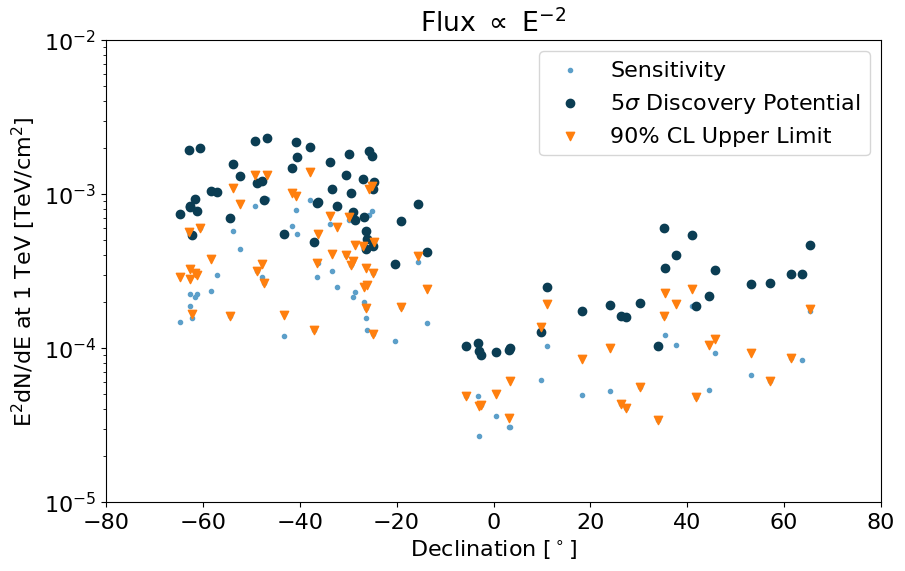

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

colors = ['#0B3D53', '#FF7F0E',  '#5C9FC9']


ax.scatter(decs, sens_E2_plot, color=colors[2], marker='.', label='Sensitivity')
ax.scatter(decs, dp_5sigma_E2_plot, color=colors[0], label=r'5$\sigma$ Discovery Potential')
ax.scatter(decs, UL_E2_plot, marker ='v', color=colors[1], label='90% CL Upper Limit')
plt.legend()
ax.set_title('Flux $\propto$ E$^{-2}$')
ax.set_ylabel('E$^2$dN/dE at 1 TeV [TeV/cm$^2$]')
ax.set_xlabel('Declination [$^\circ$]')
ax.semilogy()
ax.set_xlim(-80,80)
ax.set_ylim(1e-5,1e-2)


(0.0001, 10)

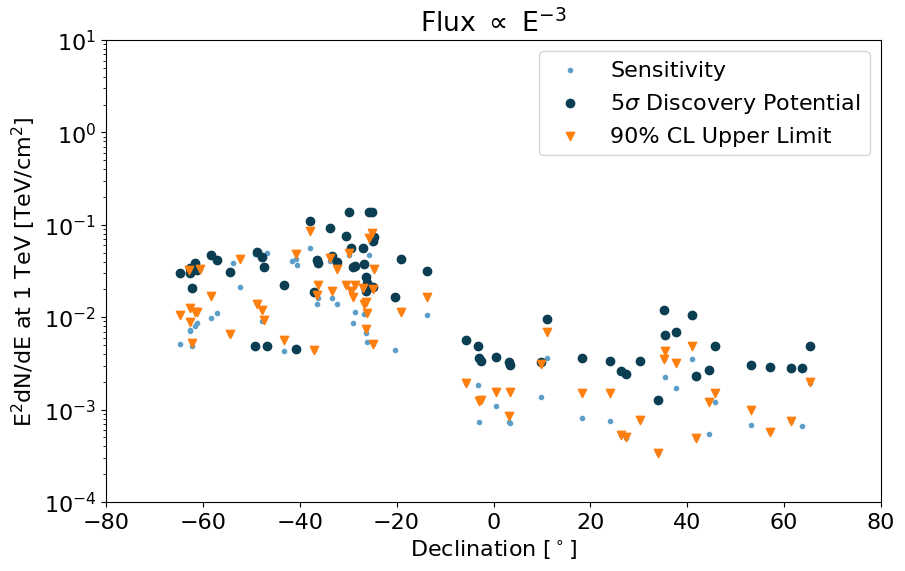

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

colors = ['#0B3D53', '#FF7F0E',  '#5C9FC9']


ax.scatter(decs, sens_E3_plot, color=colors[2], marker='.', label='Sensitivity')
ax.scatter(decs, dp_5sigma_E3_plot, color=colors[0], label=r'5$\sigma$ Discovery Potential')
ax.scatter(decs, UL_E3_plot, marker ='v', color=colors[1], label='90% CL Upper Limit')
plt.legend()
ax.set_title('Flux $\propto$ E$^{-3}$')
ax.set_ylabel('E$^2$dN/dE at 1 TeV [TeV/cm$^2$]')
ax.set_xlabel('Declination [$^\circ$]')
ax.semilogy()
ax.set_xlim(-80,80)
ax.set_ylim(1e-4,10)


In [27]:
[n for n in UL_E3.keys() if UL_E3[n] == np.inf]

['4U_0115_plus_634',
 'Vela_X_dash_1',
 'Cir_X_dash_1',
 'Sco_X_dash_1',
 '4U_1624_dash_490',
 'IGR_J16393_dash_4643',
 '4U_1636_dash_536',
 'EXO_1657_dash_419',
 'H_1745_dash_203',
 'IGR_J18483_dash_0311']

In [28]:
#Stacking Results

In [29]:

src_gamma = 2.0
thresh = 0.0
lag = 0.0
cutoff = np.inf
unblinded_pvals = {}

weights = ['equal', 'flux']
all_pvals_stacking = {}
for w in weights:
    unblinded_result = np.load(f'/data/user/ssclafani/data/analyses/XRB_baseline_v1.0/combo/lc/stacking/trials/results/results_{w}.npy')
    print(unblinded_result)
    unblinded_ts = unblinded_result['ts']
    trials = np.load('/data/user/ssclafani/data/analyses/XRB_baseline_v1.0/combo/lc/stacking/TSD_chi2.dict', allow_pickle = True)

    b = cy.bk.get_best(trials,  'fit_gamma',  'src_gamma_{}'.format(src_gamma),
                                                    'thresh_{}'.format(thresh), 'lag_{}'.format(lag),  'cutoff_{}'.format(cutoff), 'weight_{}'.format(w), 'gp_inj', 'bg')
    #print(np.mean(b.trials.ts > unblinded_ts[0])) 
    unblinded_pvals[w] = np.mean(b.trials.ts > unblinded_ts[0])
    print(f'p-value: {w}: {unblinded_pvals}')

    pval_stacking = [np.mean(b.trials.ts >= ts) for ts in b.trials.ts]
    all_pvals_stacking[w] = pval_stacking


[(2.30923497, 51.22674102, 4.01435174e+09, 3.49397371, 0.2582)]
p-value: equal: {'equal': 0.2582}
[(1.25, 0., 1.66112976e+09, 0., 0.6795)]
p-value: flux: {'equal': 0.2582, 'flux': 0.6814}


In [30]:
unblinded_result

array([(1.25, 0., 1.66112976e+09, 0., 0.6795)],
      dtype=[('gamma', '<f8'), ('ns', '<f8'), ('seed', '<f8'), ('ts', '<f8'), ('pval', '<f8')])

In [31]:
min(unblinded_pvals.values())

0.2582

In [32]:
values = np.array(list(all_pvals_stacking.values()))
lowest_pvalues_stacking = values.min(axis=0)

post_trials_pval_stacking = np.mean(lowest_pvalues_stacking < min(unblinded_pvals.values()))

In [33]:
print(post_trials_pval_stacking)

0.4042


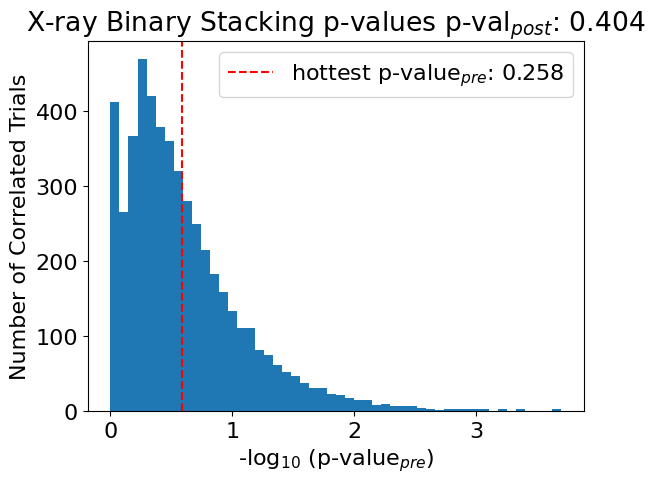

In [34]:
plt.hist(-np.log10(lowest_pvalues_stacking), bins=50)
plt.axvline(-np.log10(0.2582), c='r', ls='--', 
    label=r'hottest p-value$_{pre}$: 0.258')
plt.xlabel('-log$_{10}$ (p-value$_{pre}$)')
plt.ylabel('Number of Correlated Trials')

plt.title(f'X-ray Binary Stacking p-values p-val$_{{post}}$: {post_trials_pval_stacking:.3f}')
plt.legend()

In [35]:
for weight in weights:
    for spectrum in [2.0, 3.0]:
        ul = np.load(f'/data/user/ssclafani/data/analyses/XRB_baseline_v1.0/combo/lc/stacking/trials/{weight}_E{spectrum}_UL.npy', allow_pickle=True)[()]
        print(weight, spectrum, ul['flux_E2dNdE_1TeV'])

equal 2.0 0.0004398727139797231
equal 3.0 0.013342649130427325
flux 2.0 9.527037401437051e-05
flux 3.0 0.0012886626244644245
